In [84]:
import pickle
import pandas as pd
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Smart meter description

In [85]:
meter_description = pd.read_csv('./data/smart_meter_description.csv', engine='python')
meter_description.index = meter_description.id
meters = meter_description.id.tolist()
meters

['BBB6004',
 'BBB6007',
 'BBB6017',
 'BBB6018',
 'BBB6020',
 'BBB6021',
 'BBB6022',
 'BBB6025',
 'BBB6028',
 'BBB6029',
 'BBB6030',
 'BBB6032',
 'BBB6036',
 'BBB6040',
 'BBB6048',
 'BBB6050',
 'BBB6051',
 'BBB6052',
 'BBB6055',
 'BBB6061',
 'BBB6062',
 'BBB6063',
 'BBB6064',
 'BBB6065',
 'BBB6067',
 'BBB6071',
 'BBB6074',
 'BBB6078',
 'BBB6086',
 'BBB6087',
 'BBB6097',
 'BBB6100',
 'BBB6103',
 'BBB6105',
 'BBB6133',
 'BBB6140',
 'BBB6168',
 'BBB6169',
 'BBB6170',
 'BBB6171',
 'BBB6173',
 'BBB6177',
 'BBB6178',
 'BBB6179',
 'BBB6180',
 'BBB6181',
 'BBB6182',
 'BBB6183',
 'BBB6186',
 'BBB6190',
 'BBB6191',
 'BBB6192',
 'BBB6197',
 'BBB6198']

In [86]:
meter_description = pd.read_csv('./data/smart_meter_description.csv', engine='python')
meter_description.index = meter_description.id
meter_description.drop(columns={'id'}, inplace=True)
meter_description

,Contractual power (kW),Production (kW),Type
id,,,
BBB6004,40.0,10.8,NaN
BBB6007,NaN,NaN,pump
BBB6017,1.5,31.0,company
BBB6018,137.0,155.0,company
BBB6020,100.0,0.0,university
BBB6021,35.0,50.0,company
BBB6022,95.0,0.0,Pump
BBB6025,7.7,19.3,company
BBB6028,125.0,0.0,pool


# Load datasets

Decide on order and dropna here!!

In [87]:
def scale(array):
    # Very important to scale!
    sc = Normalizer(norm='l2')
    array = sc.fit_transform(array)
    return array


def df_and_np_array():
    df1 = pd.read_csv('./data/angelos_files/clean_mongo.csv', index_col=0)
    df2 = pd.read_csv('./data/angelos_files/clean_sql.csv', index_col=0)
    # df1 = pd.read_csv('./data/clean_oldmongo_small.csv', index_col=0)
    # df2 = pd.read_csv('./data/clean_sql_small.csv', index_col=0)
    df1 = df1[df1['id'] != 'BBB6179']
    df1 =df1[df1['id'] != 'BBB6169']    

    all_data = pd.concat([df1,df2])
    all_data.dropna(axis=0, inplace=True)
    all_data = all_data.reset_index(drop=True)

    X = all_data.copy()
    X = X.drop(columns=['id', 'date'])
    X = X.values.copy()
    return(all_data, X)

all_data, X = df_and_np_array()
X = scale(X)

all_data.date = pd.to_datetime(all_data.date)
all_data['month'] = all_data.date.dt.month
all_data['day'] = all_data.date.dt.day_of_week


all_data

(6913, 26)
(7944, 26)


,date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,id,month,day
0,2019-05-14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7554.000,21946.000,...,8347.000,8014.000,6179.000,6463.000,6140.000,6262.000,6283.000,BBB6004,5,1
1,2019-05-15,6301.000,6452.000,6235.000,6226.000,1728.000,1461.000,17290.000,25178.000,21630.000,...,6867.000,6507.000,6049.000,5975.000,6019.000,6029.000,6348.000,BBB6004,5,2
2,2019-05-16,6104.000,6128.000,6094.000,5524.000,1635.000,1708.000,19002.000,21342.000,19888.000,...,7374.000,6592.000,7265.000,5666.000,5619.000,5645.000,5975.000,BBB6004,5,3
3,2019-05-17,5835.000,5747.000,5769.000,5133.000,1472.000,1145.000,4679.000,6428.000,14344.000,...,5620.000,3513.000,5934.000,5971.000,6082.000,6113.000,5959.000,BBB6004,5,4
4,2019-05-18,5972.000,6011.000,6055.000,6049.000,1887.000,1539.000,11367.000,19895.000,23247.000,...,1276.000,3045.000,5584.000,5703.000,5838.000,5885.000,5689.000,BBB6004,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14796,2022-06-22,9.712,11.390,8.107,6.907,7.994,9.197,6.589,7.213,22.198,...,38.461,7.228,28.863,24.884,59.442,49.330,9.836,BBB6198,6,2
14797,2022-06-23,10.739,9.078,7.547,9.150,9.196,6.987,7.213,9.443,19.503,...,10.155,9.420,10.034,10.060,11.285,8.219,7.082,BBB6198,6,3
14798,2022-06-24,9.651,9.317,7.542,6.660,9.435,8.530,7.225,7.468,8.706,...,8.251,7.953,7.613,8.177,9.175,10.205,8.227,BBB6198,6,4
14799,2022-06-25,7.335,7.451,8.030,8.430,9.324,7.420,5.983,6.476,7.809,...,7.513,7.467,7.583,9.378,9.432,8.765,7.984,BBB6198,6,5


# Load clustering model and dataset

In [88]:
n_clusters=14
metric='dtw'
model_name = f'kmeans_{metric}_{n_clusters}'
model = pickle.load(open(f'results/models/{model_name}/model.pkl','rb'))
# model.predict(X1[1].reshape(1,-1, 1))
# model.predict(X1)

In [89]:
x_y = pd.read_csv(f'results/models/{model_name}/x_y.csv')
y = pd.read_csv(f'results/models/{model_name}/y.csv')

cluster_found = y.values.reshape(-1)
cluster_centers = model.cluster_centers_.squeeze()

In [90]:
all_data = pd.concat([all_data, y], axis=1)
all_data

,date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,id,month,day,cluster
0,2019-05-14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7554.000,21946.000,...,8014.000,6179.000,6463.000,6140.000,6262.000,6283.000,BBB6004,5,1,8
1,2019-05-15,6301.000,6452.000,6235.000,6226.000,1728.000,1461.000,17290.000,25178.000,21630.000,...,6507.000,6049.000,5975.000,6019.000,6029.000,6348.000,BBB6004,5,2,8
2,2019-05-16,6104.000,6128.000,6094.000,5524.000,1635.000,1708.000,19002.000,21342.000,19888.000,...,6592.000,7265.000,5666.000,5619.000,5645.000,5975.000,BBB6004,5,3,8
3,2019-05-17,5835.000,5747.000,5769.000,5133.000,1472.000,1145.000,4679.000,6428.000,14344.000,...,3513.000,5934.000,5971.000,6082.000,6113.000,5959.000,BBB6004,5,4,8
4,2019-05-18,5972.000,6011.000,6055.000,6049.000,1887.000,1539.000,11367.000,19895.000,23247.000,...,3045.000,5584.000,5703.000,5838.000,5885.000,5689.000,BBB6004,5,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14796,2022-06-22,9.712,11.390,8.107,6.907,7.994,9.197,6.589,7.213,22.198,...,7.228,28.863,24.884,59.442,49.330,9.836,BBB6198,6,2,6
14797,2022-06-23,10.739,9.078,7.547,9.150,9.196,6.987,7.213,9.443,19.503,...,9.420,10.034,10.060,11.285,8.219,7.082,BBB6198,6,3,8
14798,2022-06-24,9.651,9.317,7.542,6.660,9.435,8.530,7.225,7.468,8.706,...,7.953,7.613,8.177,9.175,10.205,8.227,BBB6198,6,4,10
14799,2022-06-25,7.335,7.451,8.030,8.430,9.324,7.420,5.983,6.476,7.809,...,7.467,7.583,9.378,9.432,8.765,7.984,BBB6198,6,5,10


In [91]:
def graphs(X, all_data, k, cluster_found, cluster_centers):
    scaled_data = pd.DataFrame(X, all_data.index, all_data.columns.tolist().remove('id'))
    scaled_data 
    scaled_data['cluster'] = pd.Series(cluster_found, name='cluster')
    scaled_data['month'] = all_data.month

    #plot the cluster centers and the samples that belong to each cluster:
    fig, ax= plt.subplots(4, 4, figsize=(15,15))
    clusters = {}
    i = 0 
    j = 0
    for cluster in range(0,k):
        clusters[cluster] = scaled_data[scaled_data['cluster'] == cluster].drop(columns=['cluster', 'month'])
        clusters[cluster].T.plot(ax=ax[i][j], legend=False, alpha=0.01, color='orange', label= f'Cluster {cluster}')

        cluster_centers = pd.DataFrame(cluster_centers)
        cluster_centers.iloc[[cluster]].T.plot(legend=True, color='black', ls='--', ax=ax[i][j])

        ax[i][j].set_title("Cluster " + str(cluster), fontsize=17)
        ax[i][j].set_xlabel("Time", fontsize=17)
        ax[i][j].set_ylabel("Normalized Energy", fontsize=17)
        ax[i][j].tick_params(axis='both', which='major', labelsize=12)
        ax[i][j].tick_params(axis='both', which='major', labelsize=12)
        j = j+1
        if(j==4):
            j = 0
            i = i + 1
    fig.tight_layout()
    fig.savefig("results/k14clusterCenters.png", dpi=80)
    fig.savefig("results/k14clusterCentersHighRes.png", dpi=300)
    fig.savefig("results/figures/Picture6.png", dpi=300)
    
    #clear figure:
    fig.clf()

    colors = sns.color_palette('pastel')[0:k]
    pie = scaled_data.groupby('cluster').size().plot(kind='pie', autopct='%.0f%%', textprops={'fontsize': 35},
                                  colors=colors)
    fig = pie.get_figure()
    fig.savefig("results/clusterPie.png", dpi=100)
    fig.savefig("results/figures/Picture7.png", dpi=300)

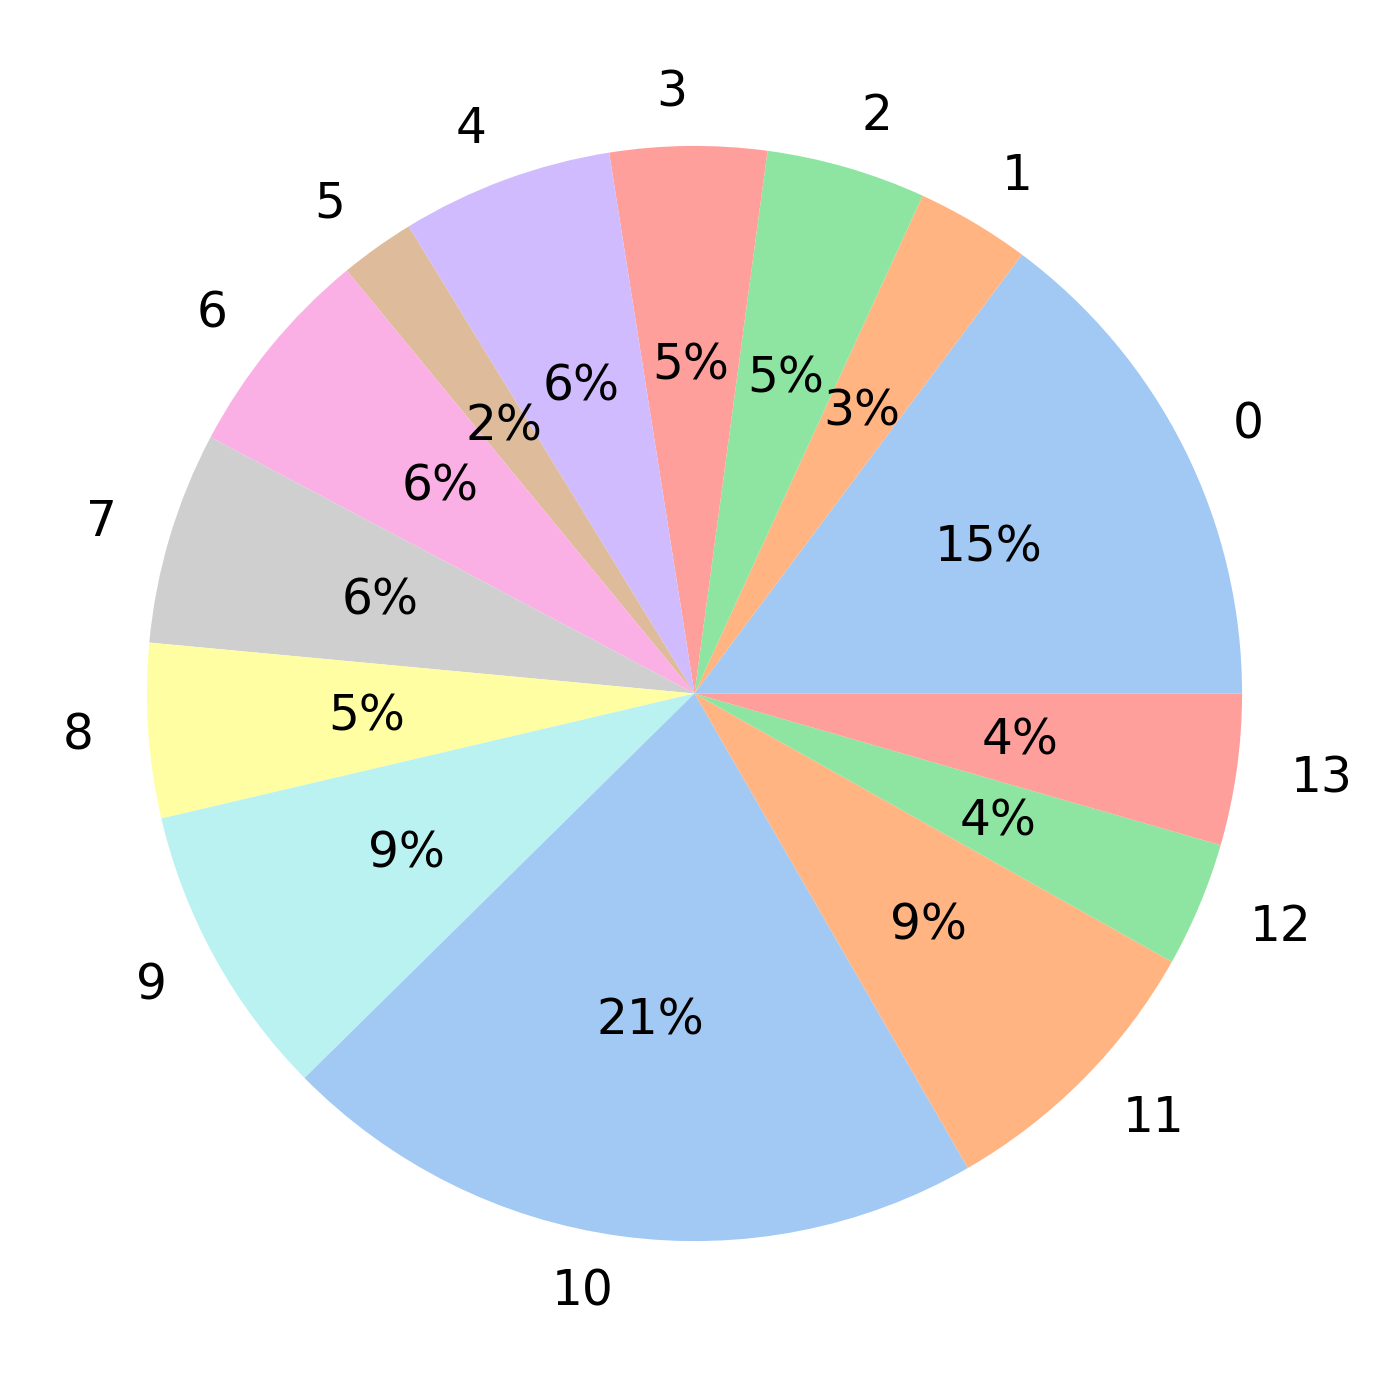

In [92]:
graphs(X, all_data, n_clusters, cluster_found, cluster_centers)

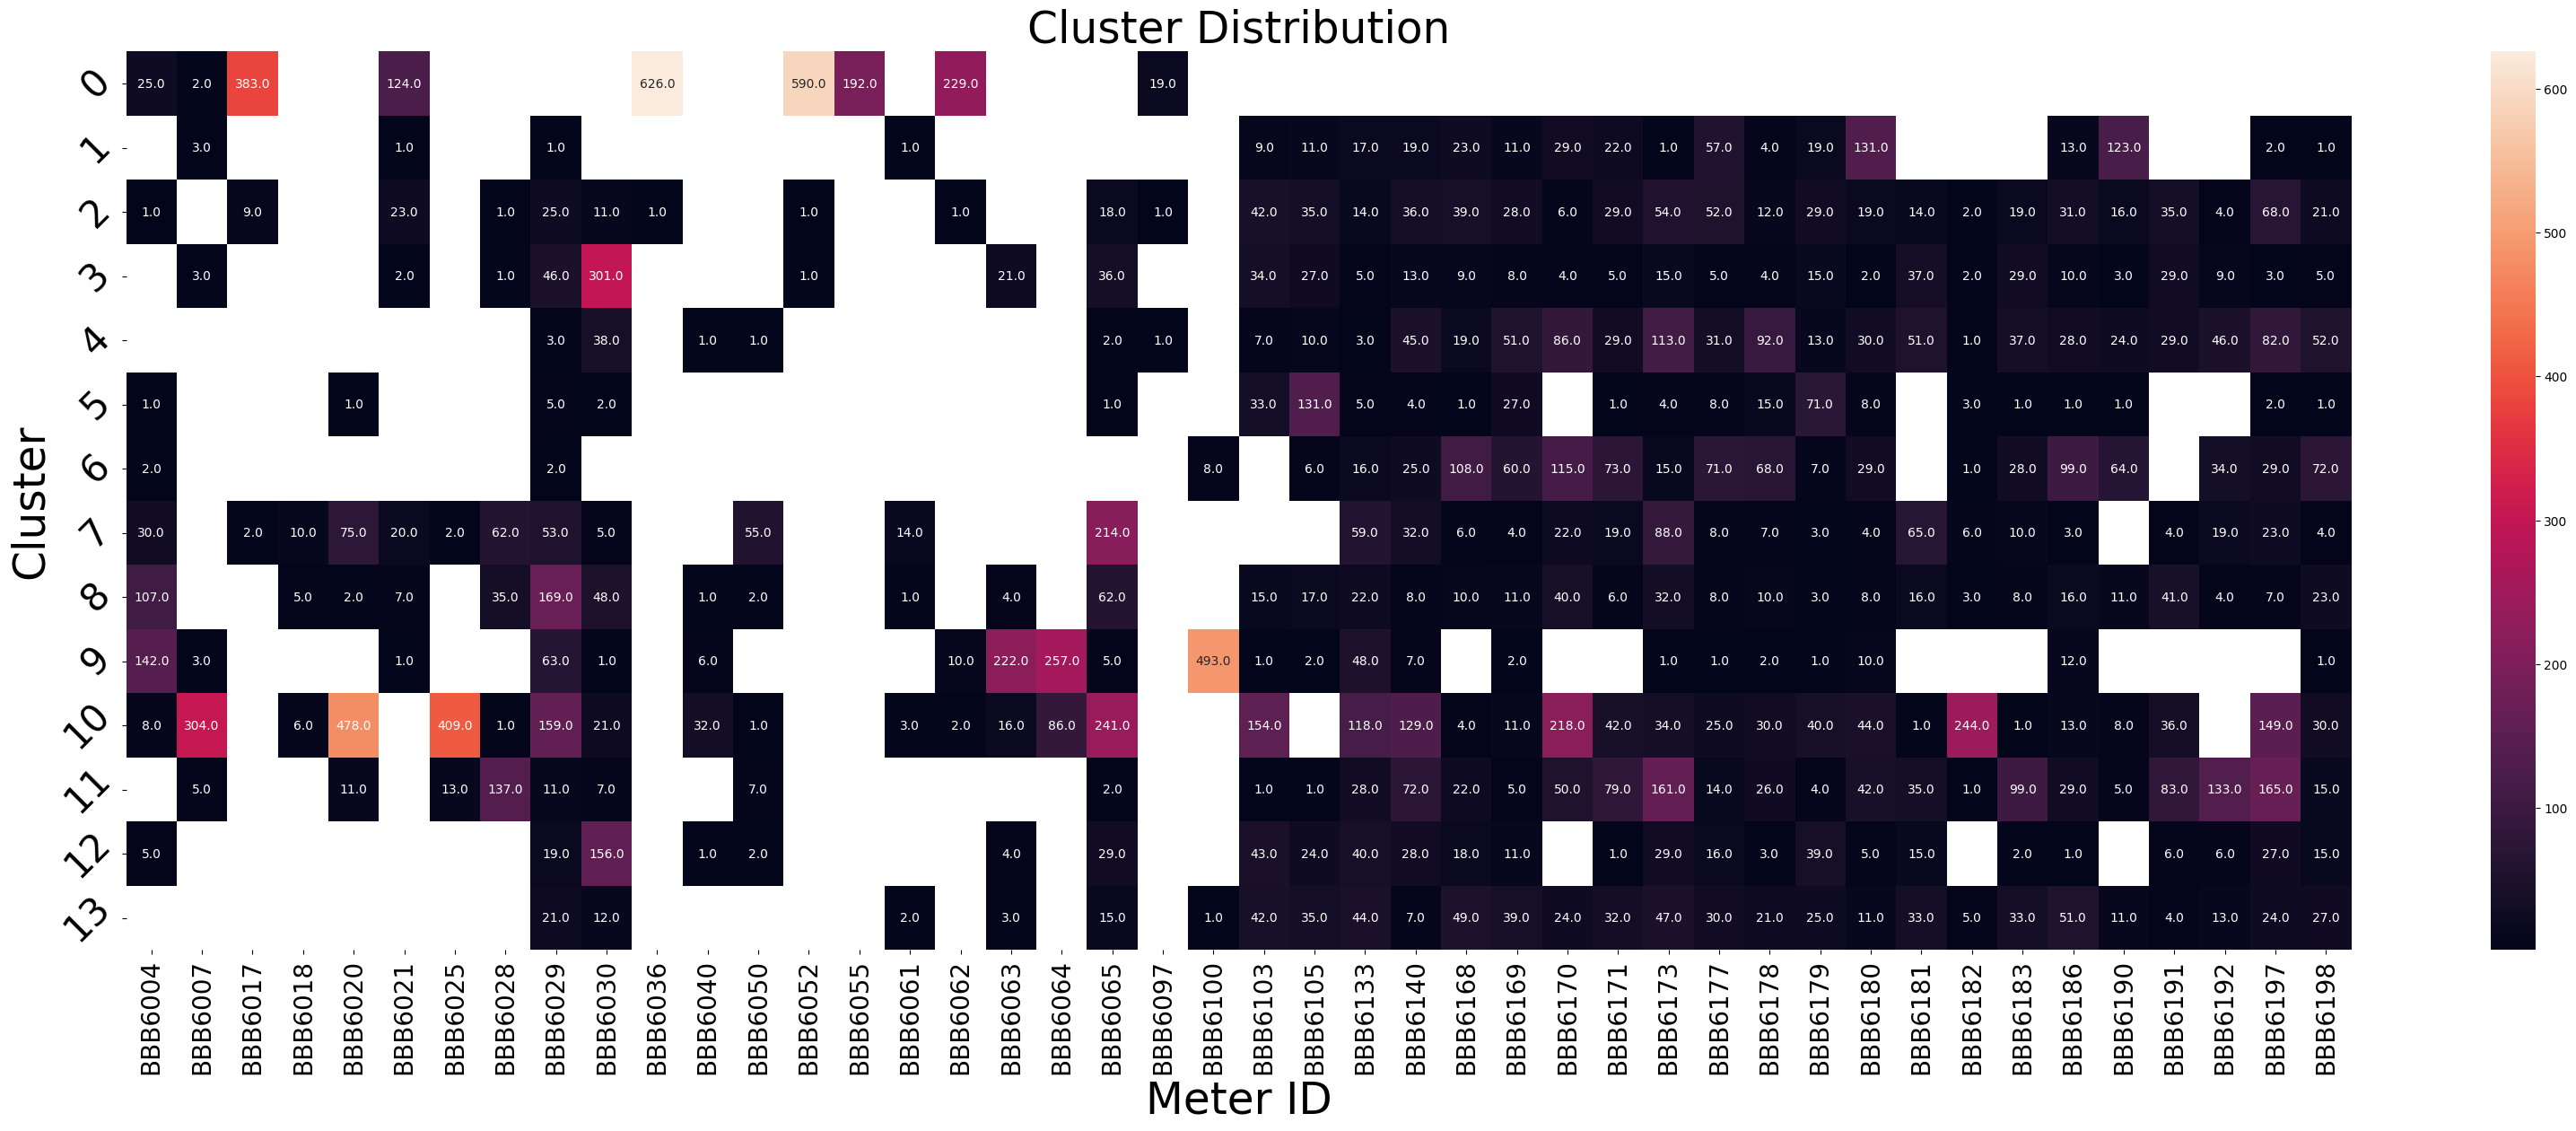

In [93]:
scaled_data = pd.DataFrame(X, all_data.index, all_data.columns.tolist().remove('id'))
scaled_data['id'] = all_data['id'] 
scaled_data['cluster'] = pd.Series(cluster_found, name='cluster')
cluster_distribution = scaled_data[0].groupby([scaled_data.cluster, scaled_data.id]).agg('count').unstack()

figure, ax = plt.subplots(1, 1, figsize=(40,13))
ax.set_title("Cluster Distribution", fontsize=35)
ax = sns.heatmap(cluster_distribution, annot=True, fmt='.1f')
plt.yticks(rotation=45, fontsize=30)
plt.ylabel('Cluster', fontsize=35)
plt.xticks(fontsize=20)
plt.xlabel('Meter ID', fontsize=35)
plt.show()
plt.show()

figure.savefig('results/figures/Picture8.png', dpi=300)
#scaled_data

Calculating Entropies for each customer:

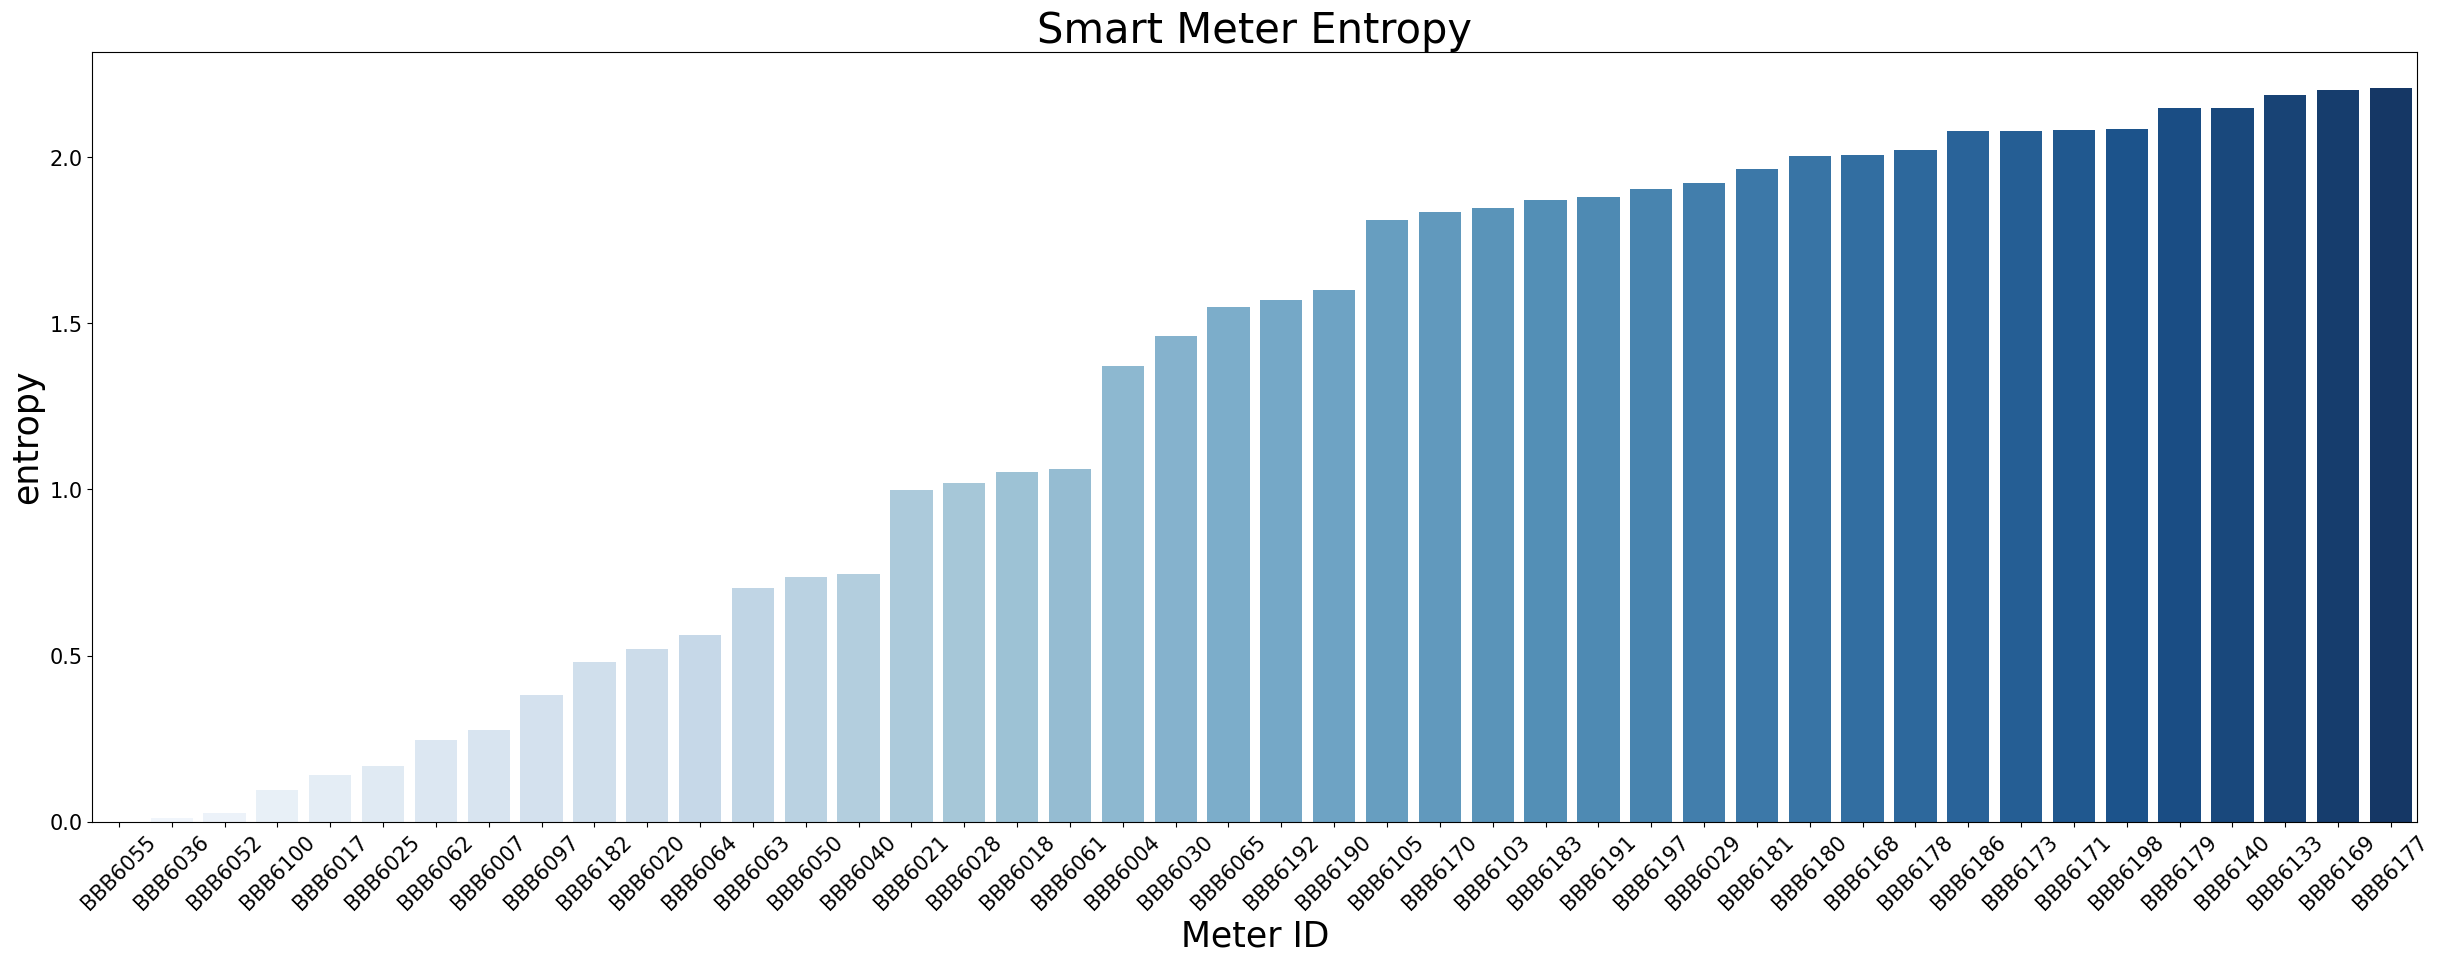

In [94]:
def calc(series):
    sum = 0
    for index, value in series.items():
        sum = sum - (value*math.log(value))
    return(sum)

def entropy(all_data, id):
    for_entropy = all_data.groupby(['id', 'cluster']).size()
    sum = for_entropy.loc[id].sum()
    relative_frequencies = for_entropy.loc[id]/sum
    return(relative_frequencies.agg(calc))

all_data['cluster'] = pd.Series(cluster_found, name='cluster')
entropies = []
IDs = pd.unique(all_data['id'])
for id in IDs:
    entropies.append(entropy(all_data, id))

#entropies = pd.Series(index=IDs, data = entropies)
entropies = pd.DataFrame(data = list(zip(IDs, entropies)), columns=['id', 'entropy'])


figure, ax = plt.subplots(1, 1, figsize=(30,10))
ax.set_title("Smart Meter Entropy", fontsize=30)
#print(entropies.index)
ax = sns.barplot(x='id', y='entropy', data=entropies.sort_values(by='entropy', ascending=True), palette='Blues')
plt.xticks(rotation=45, fontsize=17)
plt.ylabel('entropy', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Meter ID', fontsize=25)
plt.show()
figure.savefig("results/entropy.png", dpi=300)
figure.savefig("results/figures/Picture23.png", dpi=300)






Case 1: each customer belongs to many different clusters

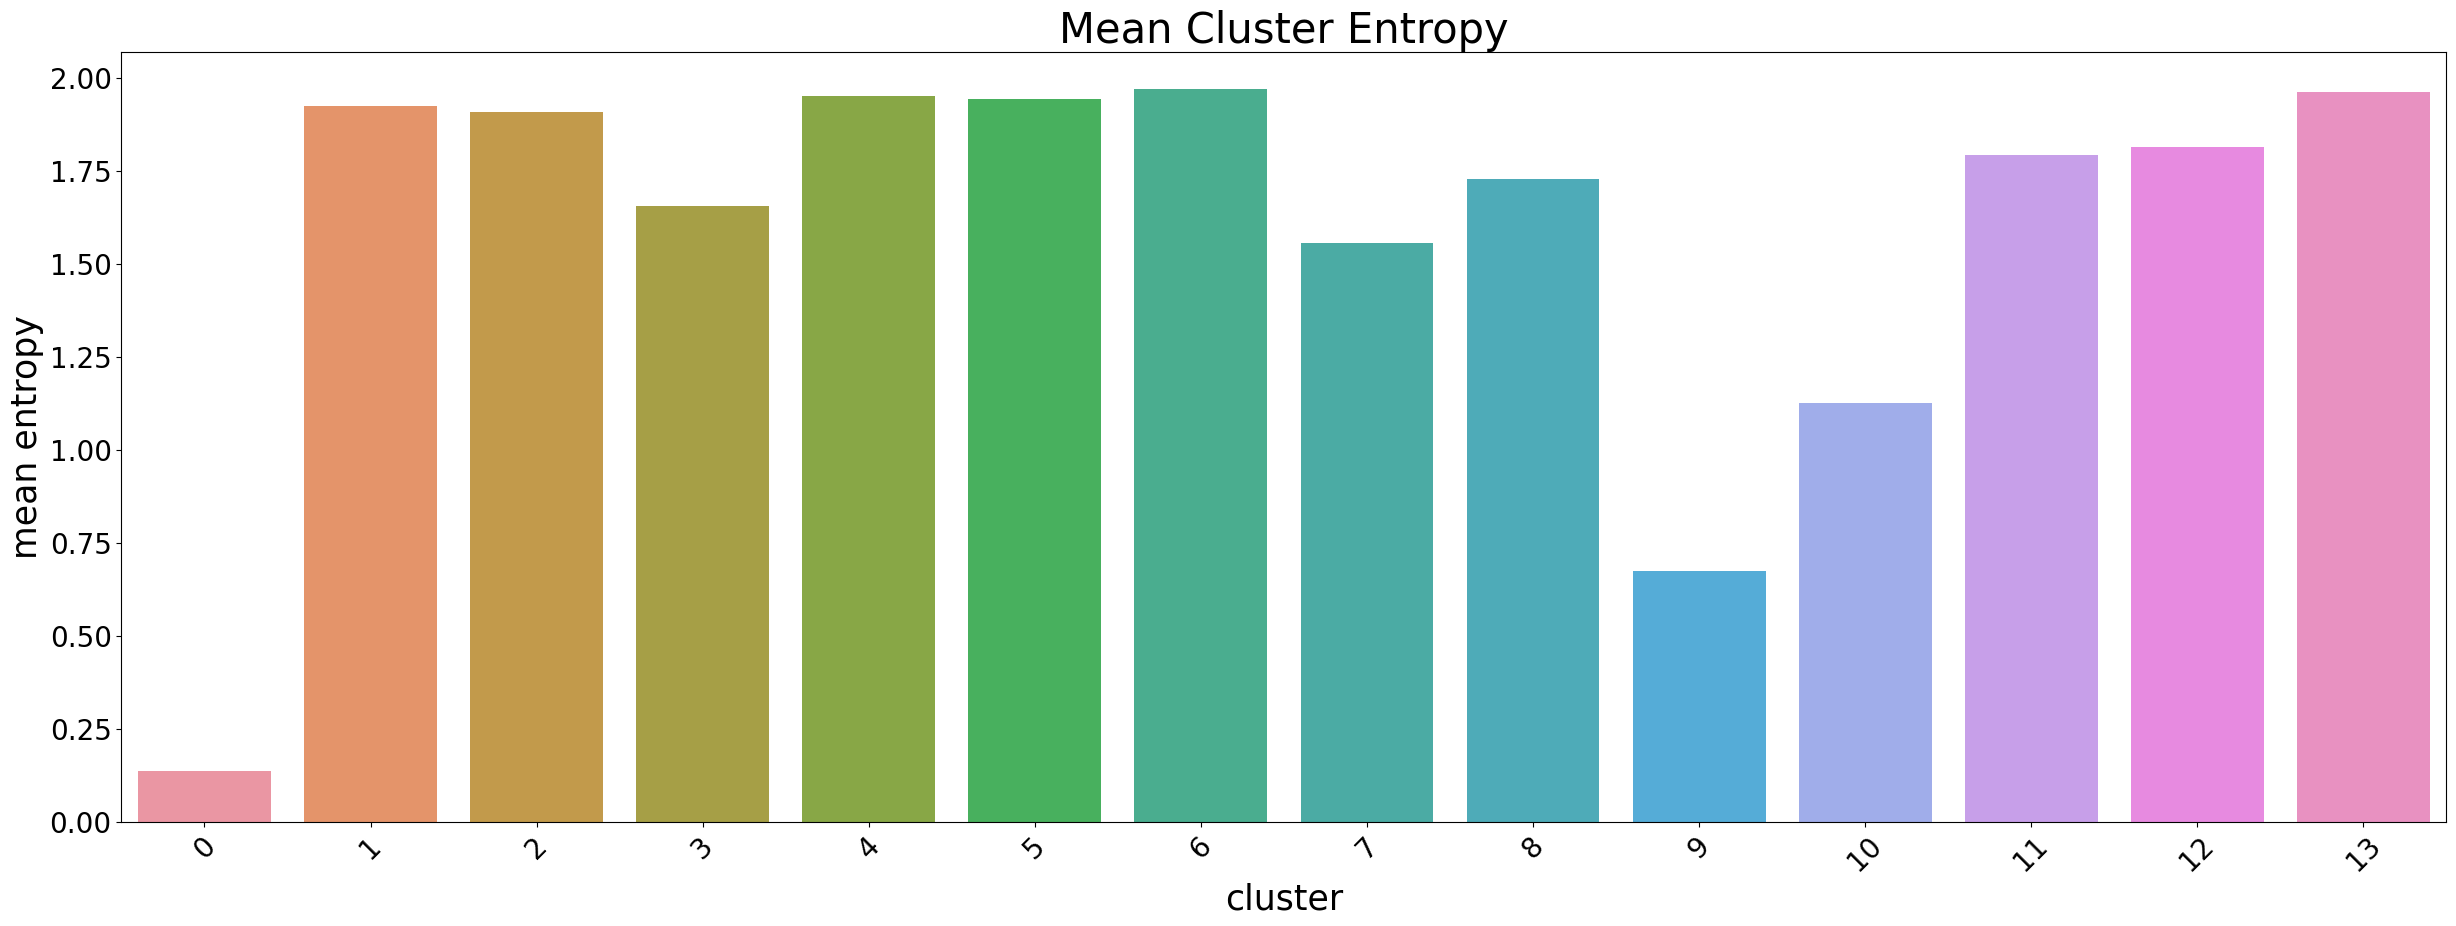

In [95]:
scaled_data = pd.DataFrame(X, all_data.index, all_data.columns.tolist().remove('id'))

scaled_data['cluster'] = pd.Series(cluster_found, name='cluster')
scaled_data['month'] = all_data.month
cluster_sizes = scaled_data.groupby('cluster').size()

entropies.index = entropies.id
entropies.drop(columns='id', inplace=True)

cluster_entropies = cluster_distribution.copy()
meters = cluster_distribution.columns
for i in meters:
    c = entropies.loc[i]
    cluster_entropies[i] = cluster_entropies[i].apply(lambda x: x*c)
cluster_entropies = cluster_entropies.sum(axis=1)
cluster_entropies = cluster_entropies / cluster_sizes

figure, ax = plt.subplots(1, 1, figsize=(30,10))
ax.set_title("Mean Cluster Entropy", fontsize=30)
ax = sns.barplot(x=cluster_entropies.index, y=cluster_entropies.values)
plt.xticks(rotation=45, fontsize=17)
plt.ylabel('mean entropy', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('cluster', fontsize=25)
plt.show()

figure.savefig("results/mean_cluster_entropy.png", dpi=300)
figure.savefig("results/figures/Picture24", dpi=300)



Case 2: each customer belongs to only one cluster.

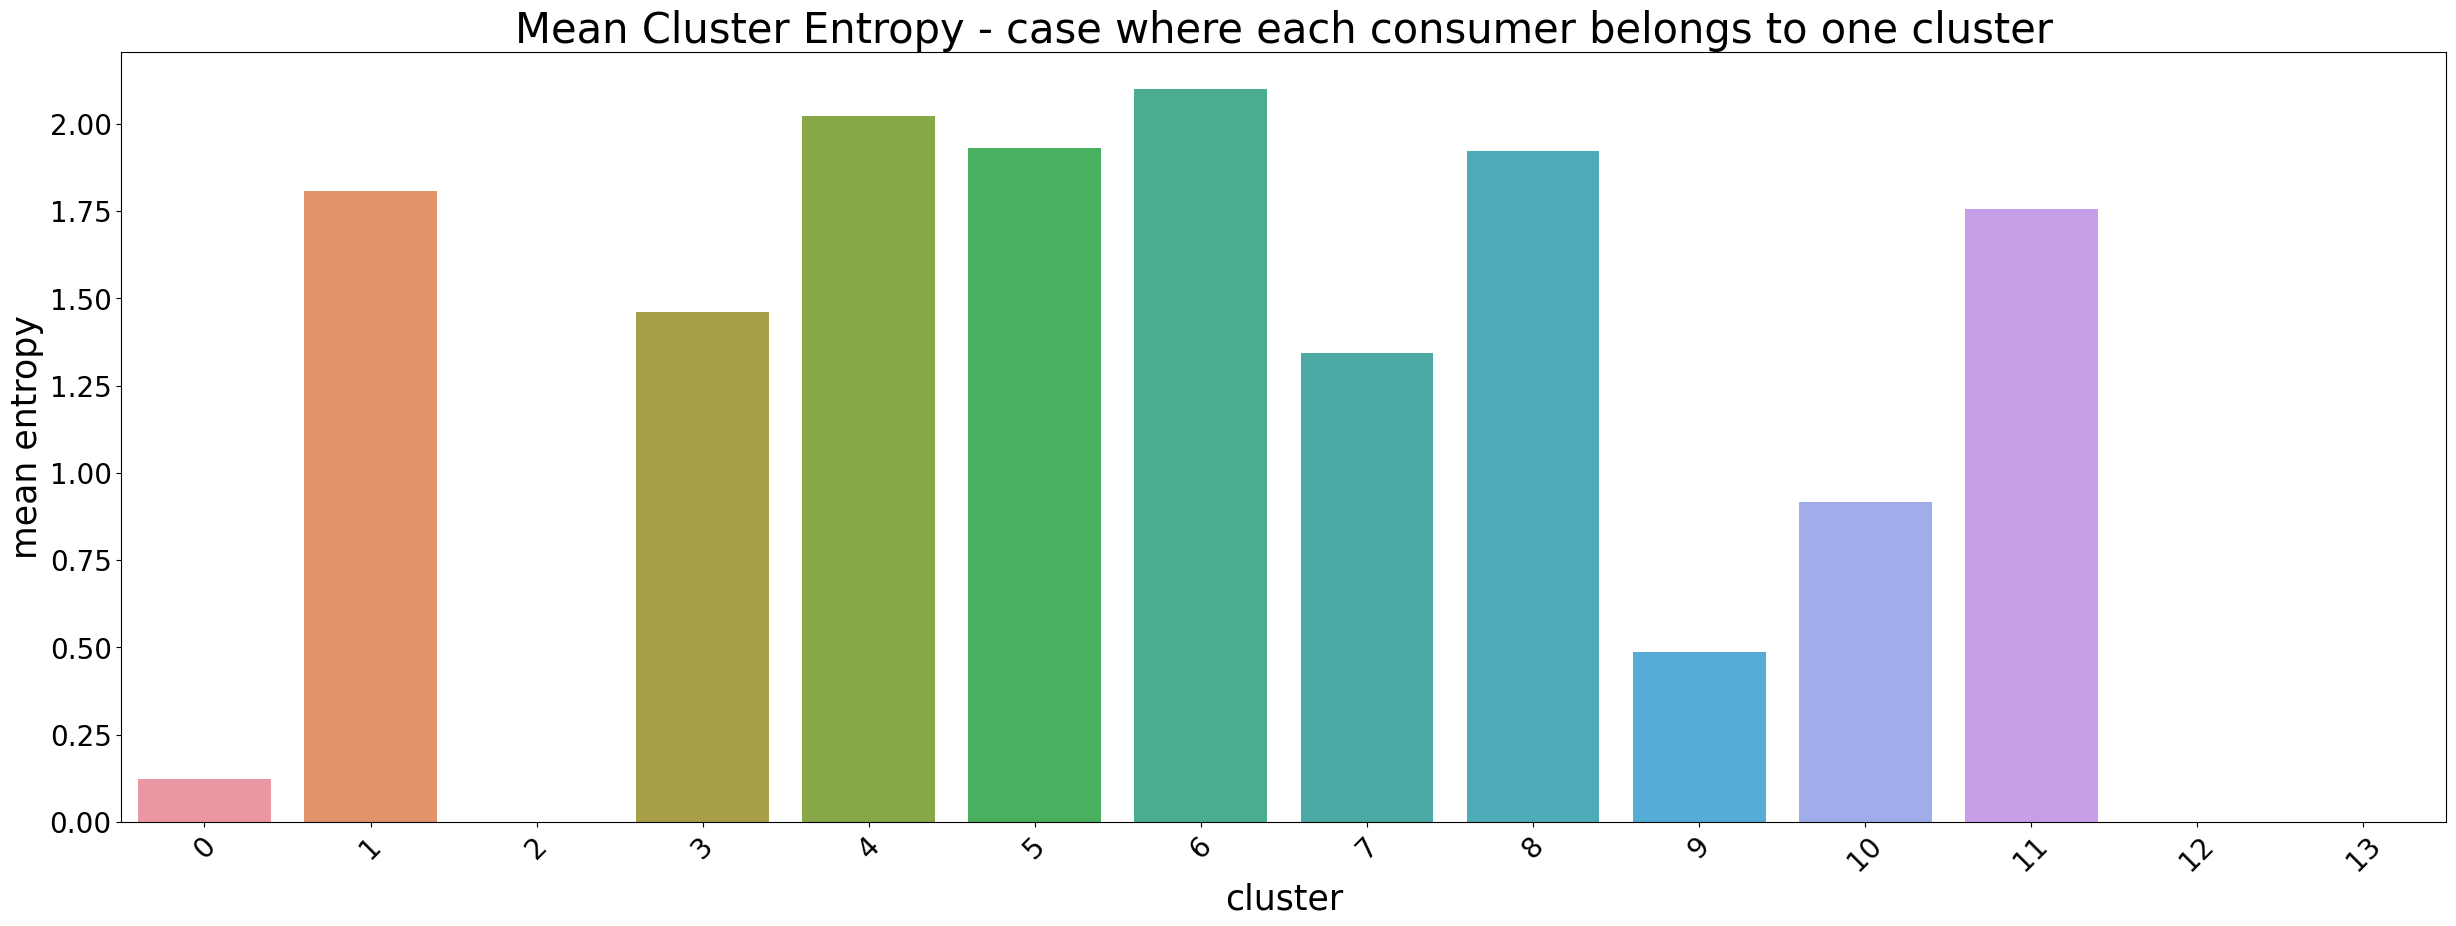

In [96]:
absolute_cluster_distribution = cluster_distribution.where(cluster_distribution.eq(cluster_distribution.max(0),axis=1))
absolute_cluster_sizes = absolute_cluster_distribution.sum(axis=1)

# entropies.index = entropies.id
# entropies.drop(columns='id', inplace=True)

cluster_entropies = absolute_cluster_distribution.copy()
meters = cluster_distribution.columns
for i in meters:
    c = entropies.loc[i]
    cluster_entropies[i] = cluster_entropies[i].apply(lambda x: x*c)
cluster_entropies = cluster_entropies.sum(axis=1)
cluster_entropies = cluster_entropies / absolute_cluster_sizes

figure, ax = plt.subplots(1, 1, figsize=(30,10))
ax.set_title("Mean Cluster Entropy - case where each consumer belongs to one cluster", fontsize=30)
ax = sns.barplot(x=cluster_entropies.index, y=cluster_entropies.values)
plt.xticks(rotation=45, fontsize=17)
plt.ylabel('mean entropy', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('cluster', fontsize=25)
plt.show()

figure.savefig("results/figures/Picture26.png", dpi=300)
figure.savefig("results/mean_cluster_entropy_2.png", dpi=300)

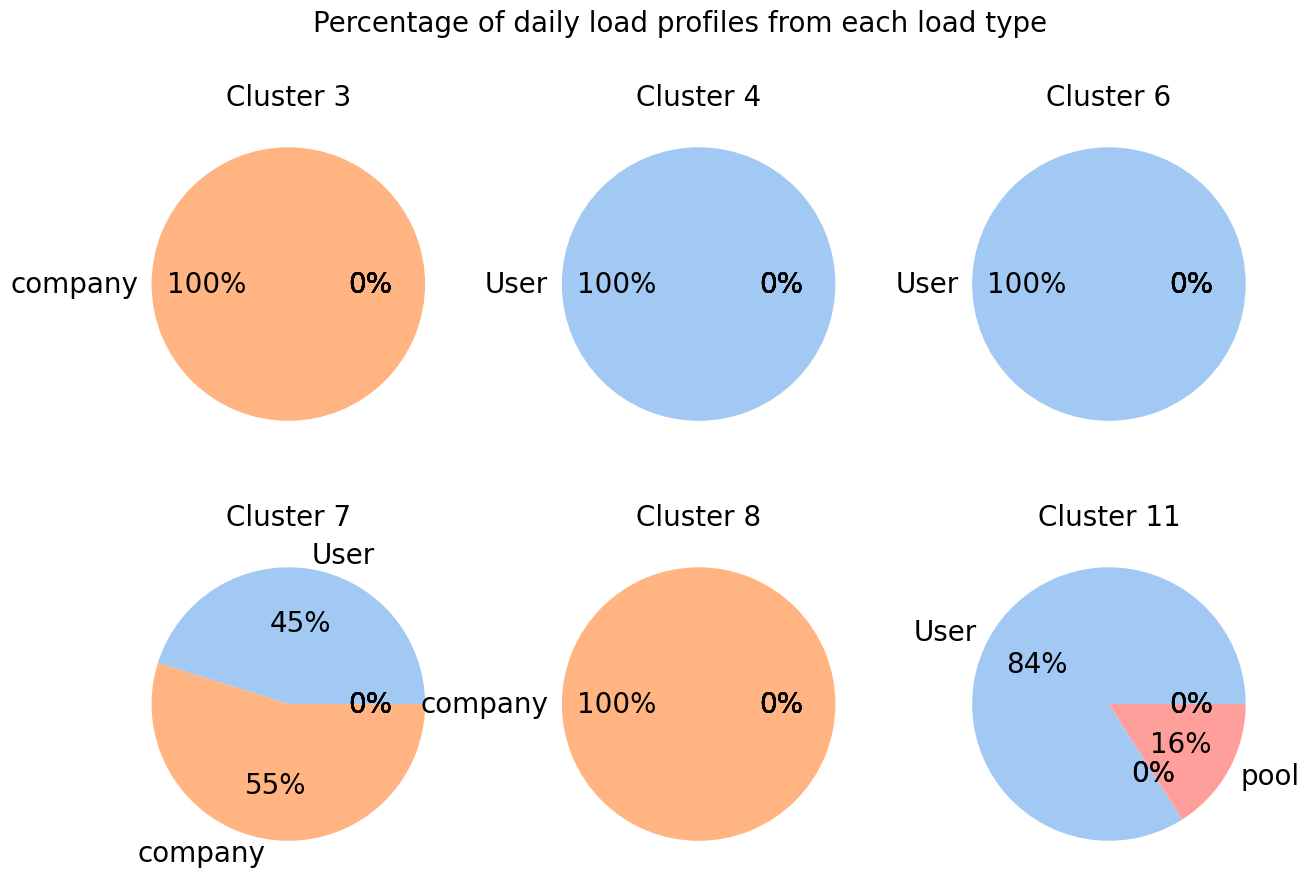

In [97]:
fig, ax= plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Percentage of daily load profiles from each load type', fontsize=20)

colors = sns.color_palette('pastel')[0:4]
k=0
j=0
for i in [3,4,6,7,8,11]:
    pd.merge(absolute_cluster_distribution.loc[i], meter_description, how='inner', on='id').groupby('Type').sum()[i].plot(fontsize=20, ax=ax[j][k], title='cluster '+str(i), kind='pie', autopct='%.0f%%', textprops={'fontsize': 18}, colors=colors, label=' ')
    ax[j][k].set_title('Cluster ' +str(i), fontsize=20)
    if(k==2):
        k = 0
        j = j+1
    else:
        k=k+1

fig.savefig("results/loadtypes_2.png", dpi=300)
fig.savefig("results/figures/Picture25.png", dpi=300)

In [98]:
def graphs_per_cluster(X, all_data, k, cluster_found, cluster_centers):
    scaled_data = pd.DataFrame(X, all_data.index, all_data.columns.tolist().remove('id'))
    scaled_data 
    scaled_data['cluster'] = pd.Series(cluster_found, name='cluster')
    scaled_data['month'] = all_data.month
    scaled_data['id'] = all_data.id
    cluster_centers = pd.DataFrame(cluster_centers)
    colors = sns.color_palette('pastel')[0:k]
    #scaled_data['day'] = all_data['day']

    for i in range(0,14):
        fig, ax= plt.subplots(1, 2, figsize=(15,5))
        
        #winter vs summer:
        scaled_data[scaled_data['cluster'] == i].drop(columns=['cluster', 'month', 'id']).T.plot(ax=ax[0], legend=False, alpha=0.01, color='gold')
        scaled_data[scaled_data['cluster'] == i].drop(columns=['cluster', 'month', 'id']).mean().plot(ax=ax[0], legend=True, color='blue', ls='--', label= 'Mean')
        scaled_data[scaled_data['cluster'] == i].drop(columns=['cluster', 'month', 'id']).median().plot(ax=ax[0], legend=True, color='red', ls='--', label= 'Median')

        cluster_centers.iloc[[i]].T.plot(legend=True, color='black', ls='--', label='Center', ax=ax[0])
        ax[0].set_title("Cluster " + str(i), fontsize=18)
        ax[0].set_xlabel("Time(h)", fontsize=14)
        ax[0].set_ylabel("Normalized Energy(kWh)", fontsize=14)

        #pie chart of cluster membership percentages: 
        df = pd.merge(scaled_data, meter_description, how='inner', on='id')
        df[df['cluster']==i].groupby('Type').size().sort_values(ascending=False).plot(ax=ax[1],kind='pie', autopct='%.0f%%', textprops={'fontsize': 12},
                                  colors=colors)
        ax[1].set_title("Load Type Distribution", fontsize=18)
        ax[1].set_ylabel("")

        fig.savefig("results/cluster" + str(i) +'.png', dpi=300)

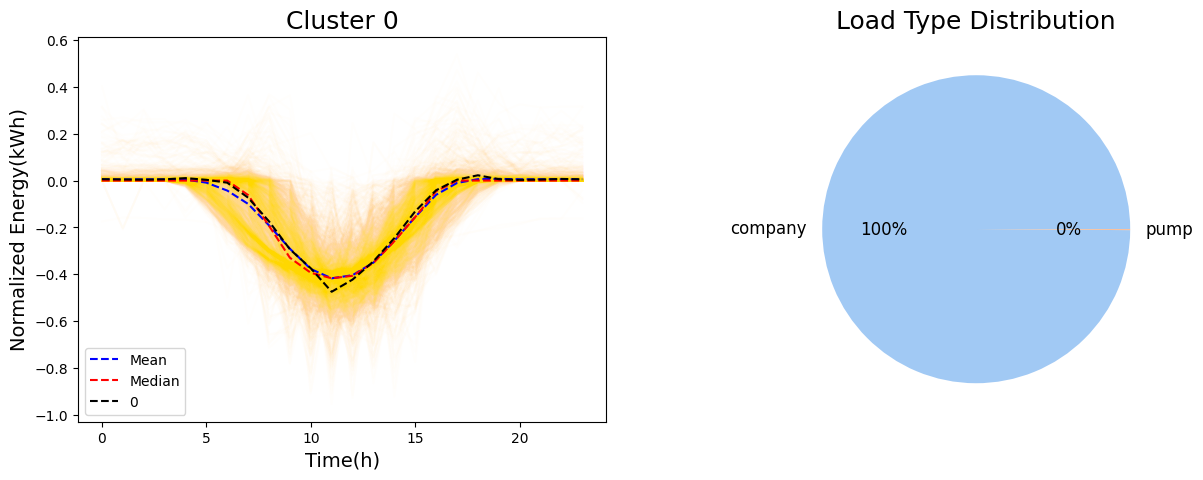

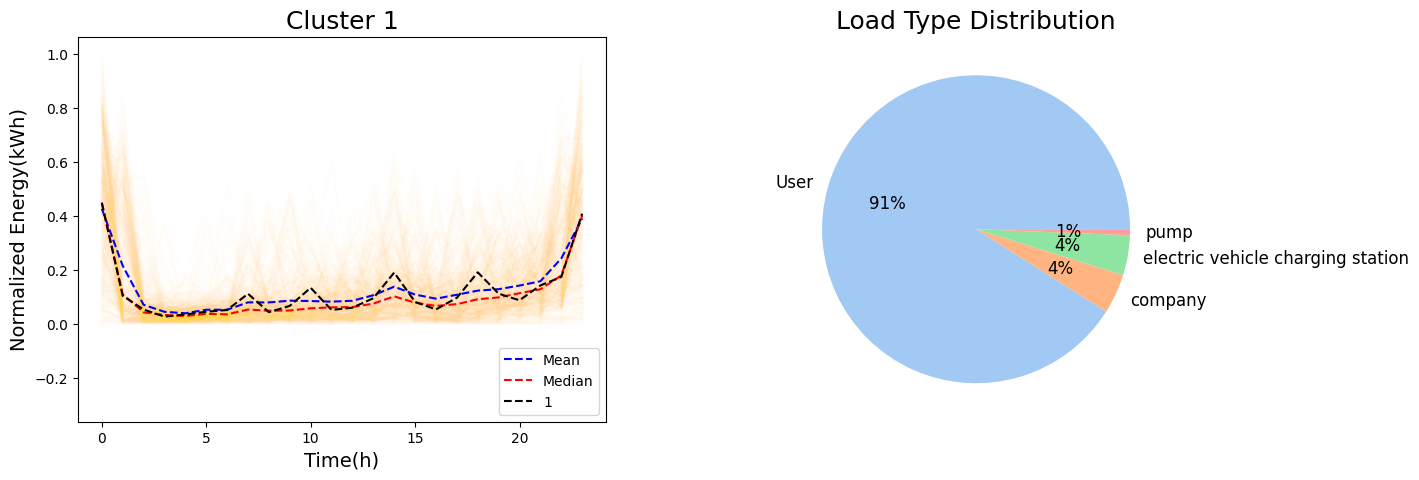

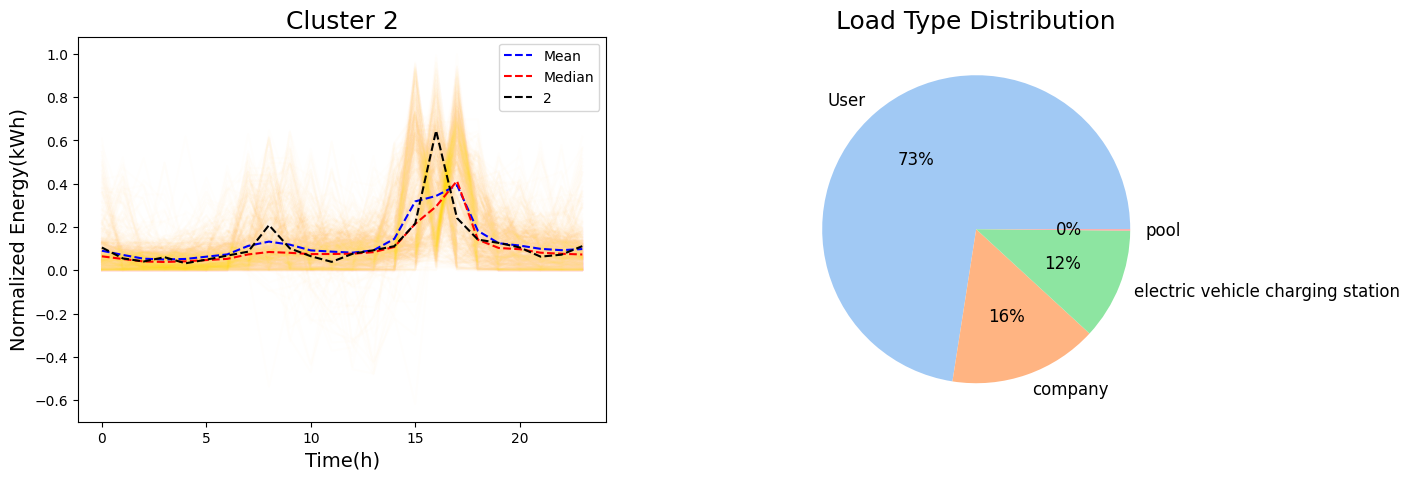

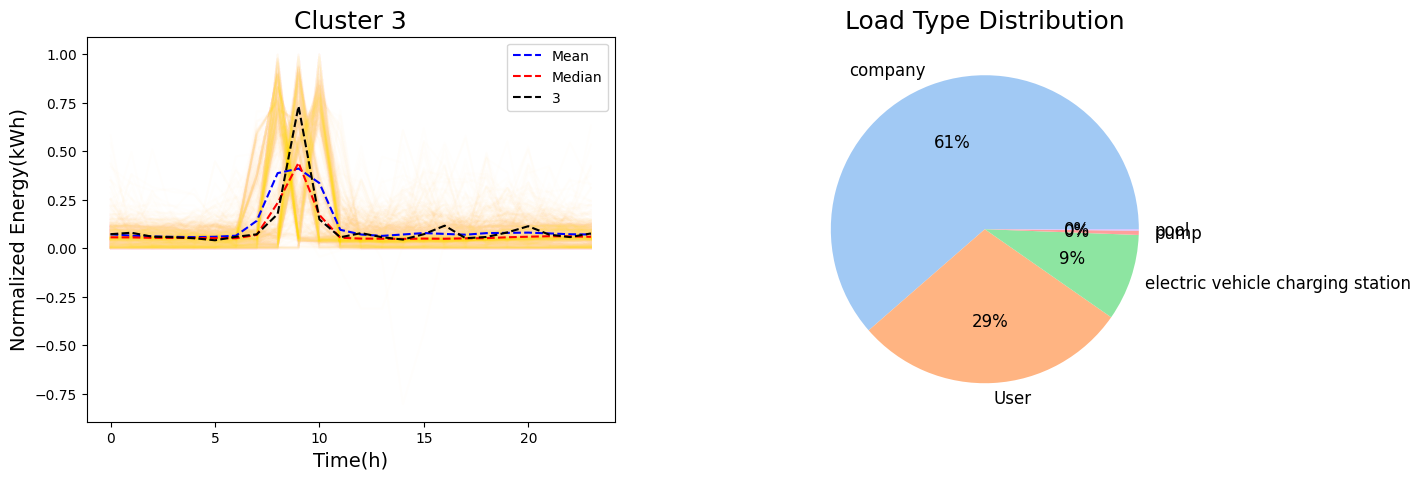

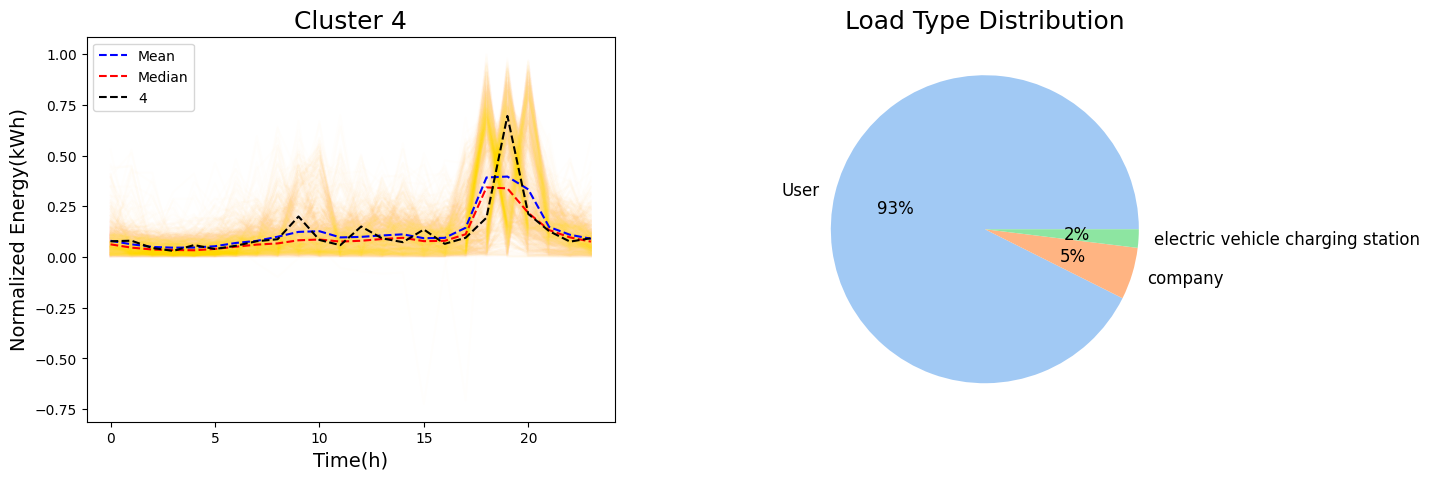

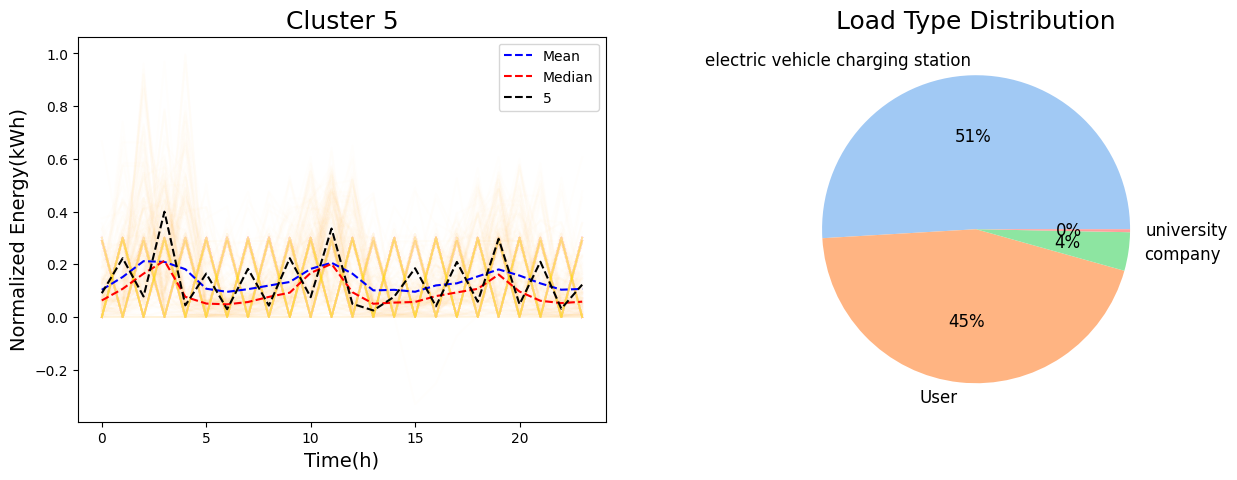

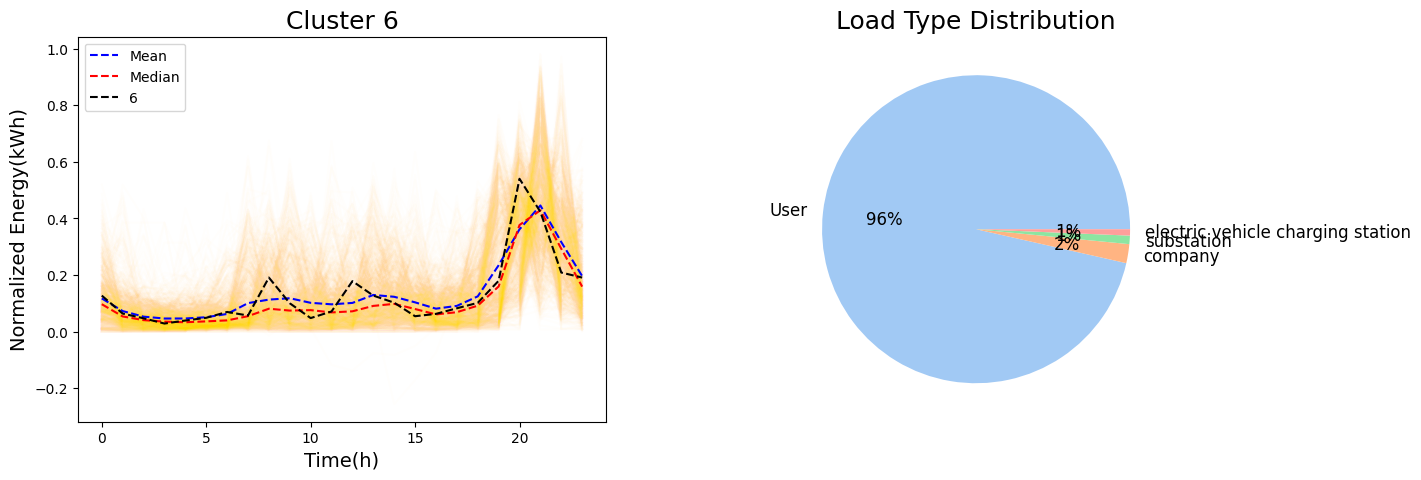

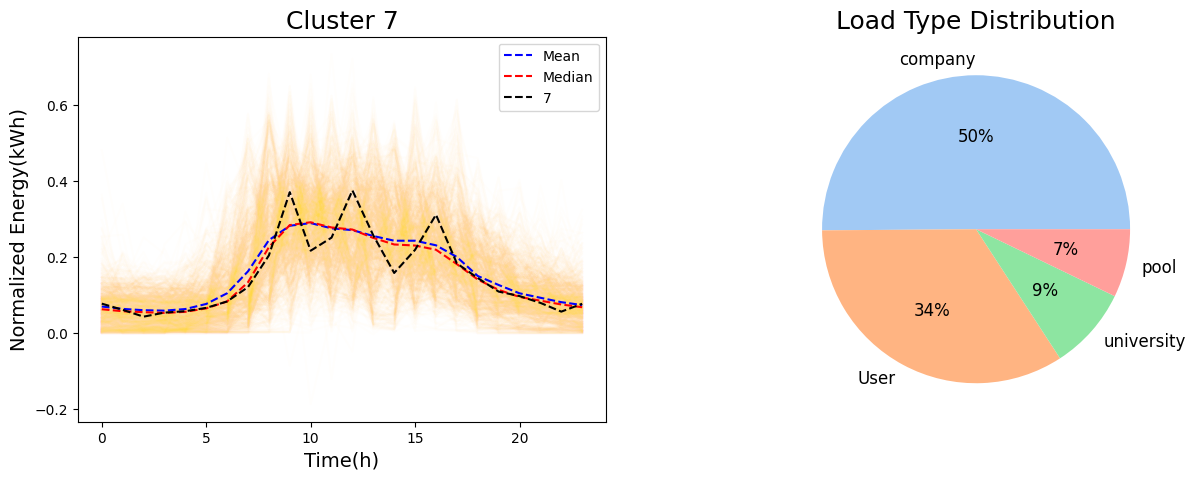

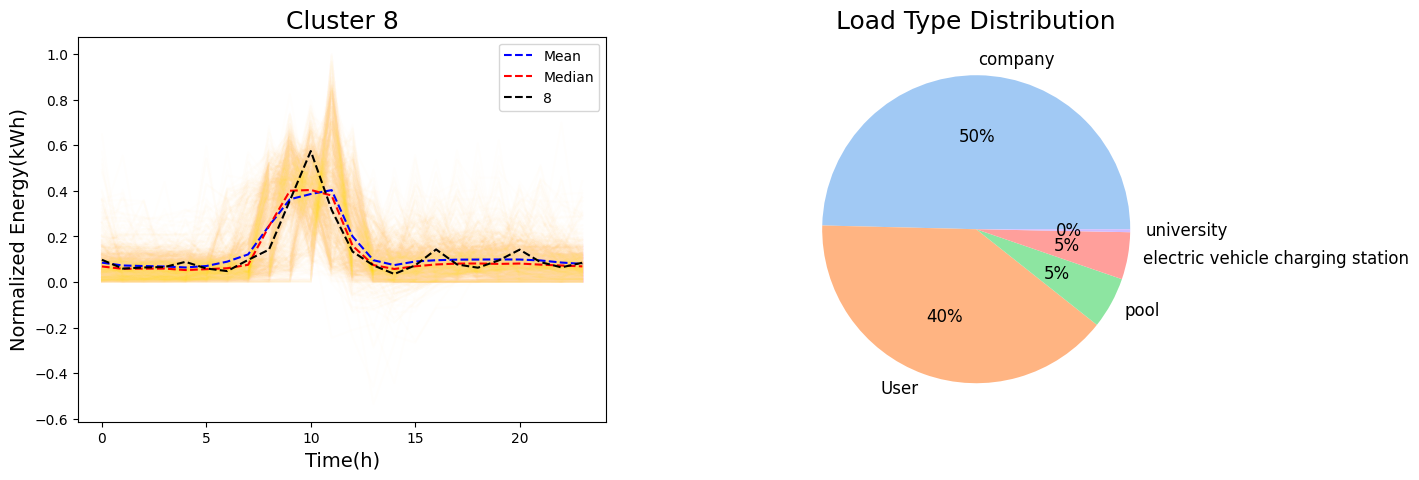

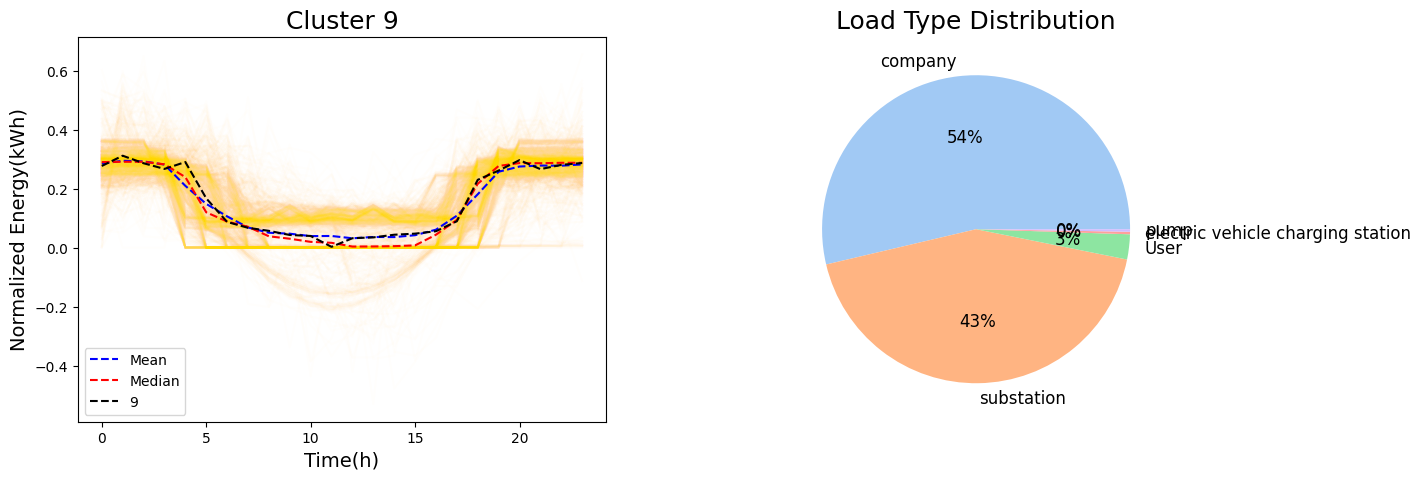

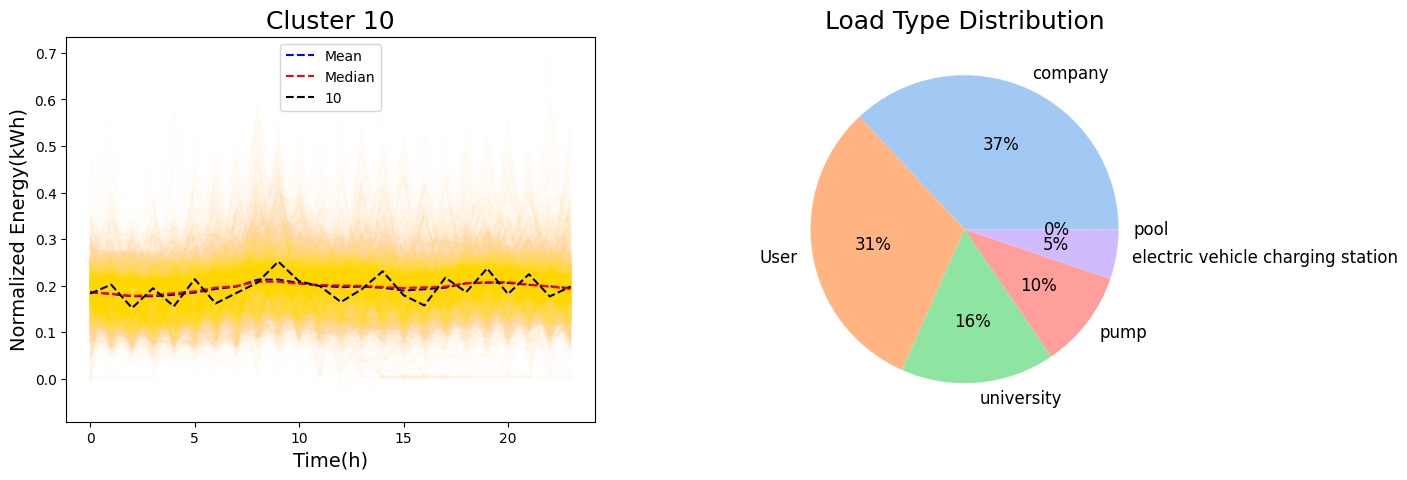

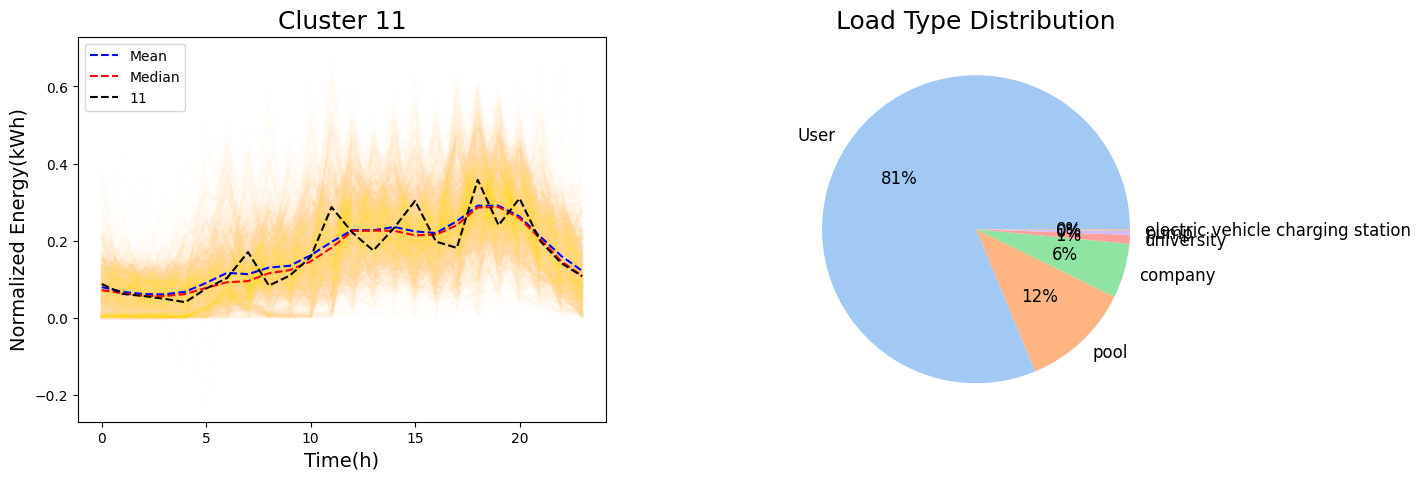

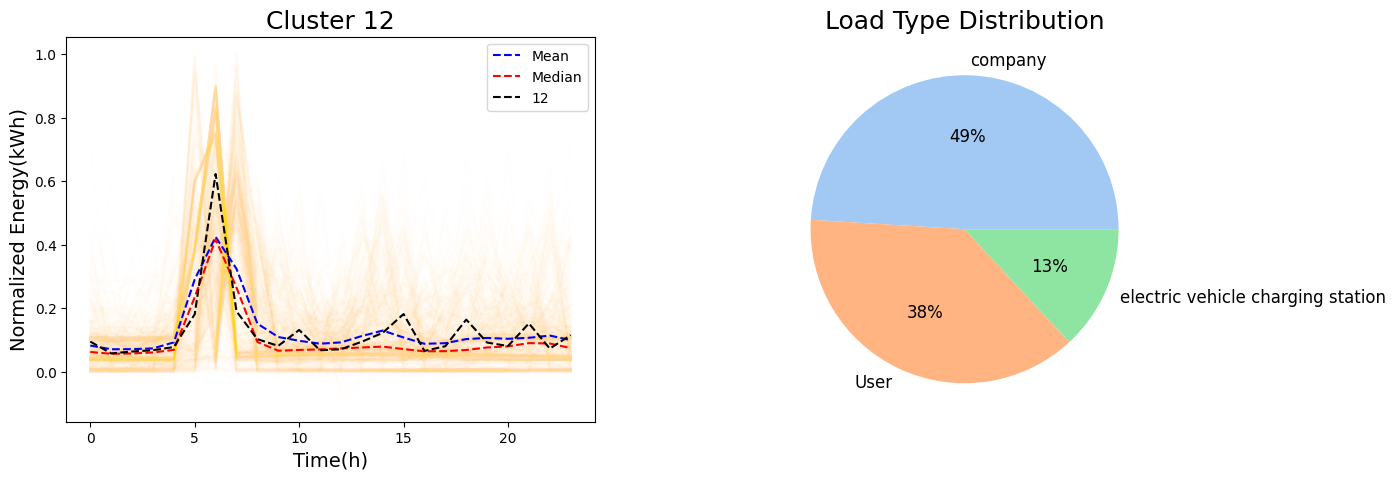

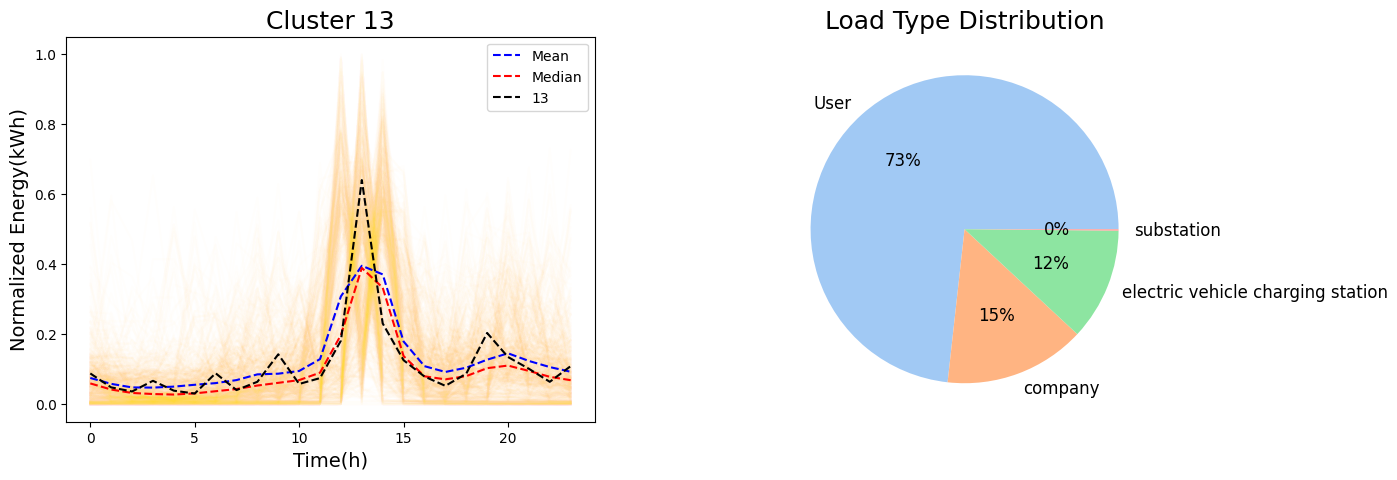

In [99]:
graphs_per_cluster(X, all_data, n_clusters, cluster_found, cluster_centers)

In [100]:
#code to format titles for the graphs to contain info on consumption, generation, use
def id_title(id, description):
    title = id + "(C,"
    if(not np.isnan(description.loc[id]['Production (kW)']) and description.loc[id]['Production (kW)']>0.0): title = title + "P,"
     
    title = title + str(description.loc[id]['Type'])

    return(title + ")")

def graphs_per_meter(X, all_data, k, cluster_found, cluster_centers):
    all_data['cluster'] = pd.Series(cluster_found, name='cluster')
    IDs = pd.unique(all_data['id'])

    colors = sns.color_palette('pastel')[0:k]
    bold_colors = ['blue', 'darkorange', 'green']

    for id in IDs: 
        fig, ax = plt.subplots(3, 3, figsize=(15,15))
        fig.suptitle(id_title(id, meter_description))

        #pie chart of cluster membership percentages: 
        all_data[all_data['id']==id].groupby('cluster').size().sort_values(ascending=False).plot(ax=ax[0][1],kind='pie', autopct='%.0f%%', textprops={'fontsize': 8},
                                  colors=colors)
        ax[0][1].set_title("Load Profile Distribution to Clusters")
        
        #visualizing the three most common clusters for this smart meter:
        most_common_clusters = all_data[all_data['id']==id].groupby('cluster').size().nlargest(3).index.tolist()
        i = 0
        for c in most_common_clusters:
            all_data[all_data['id']==id][all_data['cluster']==c].drop(columns=['cluster', 'month', 'day', 'id', 'date', 'index']).T.plot(ax=ax[0][0], legend=False, alpha=0.2, color=colors[i])
            i = i+1
        i = 0
        for c in most_common_clusters:
            all_data[all_data['id']==id][all_data['cluster']==c].drop(columns=['cluster', 'month', 'day', 'id', 'date', 'index']).mean().plot(ax=ax[0][0], legend=True, linewidth=3  ,ls='--', color=bold_colors[i], label=str(str(i+1) +': Cluster '+str(c)))
            i = i+1
        ax[0][0].set_title("Three Top Clusters")
        ax[0][0].set_xlabel("Time (h)")
        ax[0][0].set_ylabel("Energy (kWh)")

        #entropy stripplot
        entropies = []
        IDs = pd.unique(all_data['id'])
        for this_id in IDs:
            entropies.append(entropy(all_data, this_id))
        #entropies = pd.Series(index=IDs, data = entropies)
        entropies = pd.DataFrame(data = list(zip(IDs, entropies)), columns=['id', 'entropy'])
        sns.stripplot(ax=ax[0][2],x=entropies['entropy'], dodge=False)
        ax[0][2].set_title("Entropy Compared to Other Meters")

        #winter vs summer
        summer_data = all_data[all_data['id']==id][all_data['month'].isin([4,5,6,7,8,9])]
        winter_data = all_data[all_data['id']==id][all_data['month'].isin([10,11,12,1,2,3])]
        if(not summer_data.empty): summer_data.drop(columns=['cluster', 'month', 'day', 'id', 'date', 'index']).T.plot(ax=ax[1][0], legend=False, alpha=0.2, color=colors[1])
        if(not winter_data.empty): winter_data.drop(columns=['cluster', 'month', 'day', 'id', 'date', 'index']).T.plot(ax=ax[1][0], legend=False, alpha=0.2, color=colors[0])
        if(not summer_data.empty): summer_data.drop(columns=['cluster', 'month', 'day', 'id', 'date', 'index']).mean().plot(ax=ax[1][0], legend=True, ls='--', color="darkorange", linewidth=3, label='Summer Mean')
        if(not winter_data.empty): winter_data.drop(columns=['cluster', 'month', 'day', 'id', 'date', 'index']).mean().plot(ax=ax[1][0], legend=True, ls='--', linewidth=3, color="blue", label='Winter Mean')
        ax[1][0].set_title("Winter vs Summer")
        
        winter_colors = sns.color_palette('Blues')[0:k]
        if(not winter_data.empty): all_data[all_data['id']==id][all_data['month'].isin([10,11,12,1,2,3])].groupby('cluster').size().sort_values(ascending=False).plot(ax=ax[1][1],kind='pie', autopct='%.0f%%', textprops={'fontsize': 8},
                                  colors=winter_colors)
        ax[1][1].set_title("Winter Profile Distribution to Clusters")

        summer_colors = sns.color_palette('Oranges')[0:k]
        if(not summer_data.empty): all_data[all_data['id']==id][all_data['month'].isin([4,5,6,7,8,9])].groupby('cluster').size().sort_values(ascending=False).plot(ax=ax[1][2],kind='pie', autopct='%.0f%%', textprops={'fontsize': 8},
                                  colors=summer_colors)
        ax[1][2].set_title("Summer Profile Distribution to Clusters")

        #weekdays vs weekend
        weekday_data = all_data[all_data['id']==id][all_data['day'].isin([0,1,2,3,4])]
        weekend_data = all_data[all_data['id']==id][all_data['day'].isin([5,6])]
        if(not weekday_data.empty): weekday_data.drop(columns=['cluster', 'month', 'day', 'id', 'date']).T.plot(ax=ax[2][0], legend=False, alpha=0.2, color='gray')
        if(not weekend_data.empty): weekend_data.drop(columns=['cluster', 'month', 'day', 'id', 'date']).T.plot(ax=ax[2][0], legend=False, alpha=0.2, color='palegreen')
        if(not weekday_data.empty): weekday_data.drop(columns=['cluster', 'month', 'day', 'id', 'date']).mean().plot(ax=ax[2][0], legend=True, ls='--', color="black", linewidth=3, label='Weekday Mean')
        if(not weekend_data.empty): weekend_data.drop(columns=['cluster', 'month', 'day', 'id', 'date']).mean().plot(ax=ax[2][0], legend=True, ls='--', linewidth=3, color="green", label='Weekend Mean')
        ax[2][0].set_title("Weekdays vs Weekend")
        
        weekday_colors = sns.color_palette('Greys')[0:k]
        if(not weekday_data.empty): all_data[all_data['id']==id][all_data['day'].isin([0,1,2,3,4])].groupby('cluster').size().sort_values(ascending=False).plot(ax=ax[2][1],kind='pie', autopct='%.0f%%', textprops={'fontsize': 8},
                                  colors=weekday_colors)
        ax[2][1].set_title("Weekday Profile Distribution to Clusters")

        summer_colors = sns.color_palette('Greens')[0:k]
        if(not weekend_data.empty): all_data[all_data['id']==id][all_data['day'].isin([5,6])].groupby('cluster').size().sort_values(ascending=False).plot(ax=ax[2][2],kind='pie', autopct='%.0f%%', textprops={'fontsize': 8},
                                  colors=summer_colors)
        ax[2][2].set_title("Weekend Profile Distribution to Clusters")
        
        fig.savefig(str("results/"+id+".png"))
        fig.tight_layout()
        plt.show()
    
    

New mongo here due to scaling issues

In [103]:
new_data

,date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,id,month,day,cluster
6872,2022-01-26,3448.282596,3986.733209,3676.348778,4819.772329,3347.106825,3288.193326,4709.430011,4078.002636,10254.252563,...,5471.991815,4676.308593,4737.075943,3789.190877,3856.617854,4345.960034,BBB6004,1,2,7
6873,2022-01-27,3906.765824,2502.250000,3690.206021,3253.710252,3493.178552,3428.376873,2849.788082,3994.506244,10424.700748,...,2887.589415,2890.688748,1579.380064,1609.372502,2179.923626,1032.414679,BBB6004,1,3,8
6874,2022-01-28,1597.412805,2004.341149,1322.579561,1962.415085,2237.104878,1788.392269,1873.429096,3244.511028,7871.082479,...,1384.348295,1404.930084,1787.762284,1580.737936,1343.799538,1163.316113,BBB6004,1,4,8
6875,2022-01-29,1910.542391,1075.209356,1902.805573,1377.914544,1100.445971,1632.537115,1104.988213,1353.048696,5071.341354,...,1329.732945,2111.314310,830.275322,1173.895471,1901.410522,1014.375000,BBB6004,1,5,8
6876,2022-01-30,1075.893592,1341.725374,869.175016,1448.734120,1203.847677,1838.841091,1323.807023,842.191804,523.712819,...,944.812500,1048.784962,1647.800778,1085.372990,1843.241262,912.568121,BBB6004,1,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14796,2022-06-22,9.712000,11.390000,8.107000,6.907000,7.994000,9.197000,6.589000,7.213000,22.198000,...,7.228000,28.863000,24.884000,59.442000,49.330000,9.836000,BBB6198,6,2,6
14797,2022-06-23,10.739000,9.078000,7.547000,9.150000,9.196000,6.987000,7.213000,9.443000,19.503000,...,9.420000,10.034000,10.060000,11.285000,8.219000,7.082000,BBB6198,6,3,8
14798,2022-06-24,9.651000,9.317000,7.542000,6.660000,9.435000,8.530000,7.225000,7.468000,8.706000,...,7.953000,7.613000,8.177000,9.175000,10.205000,8.227000,BBB6198,6,4,10
14799,2022-06-25,7.335000,7.451000,8.030000,8.430000,9.324000,7.420000,5.983000,6.476000,7.809000,...,7.467000,7.583000,9.378000,9.432000,8.765000,7.984000,BBB6198,6,5,10


KeyError: "['index'] not found in axis"

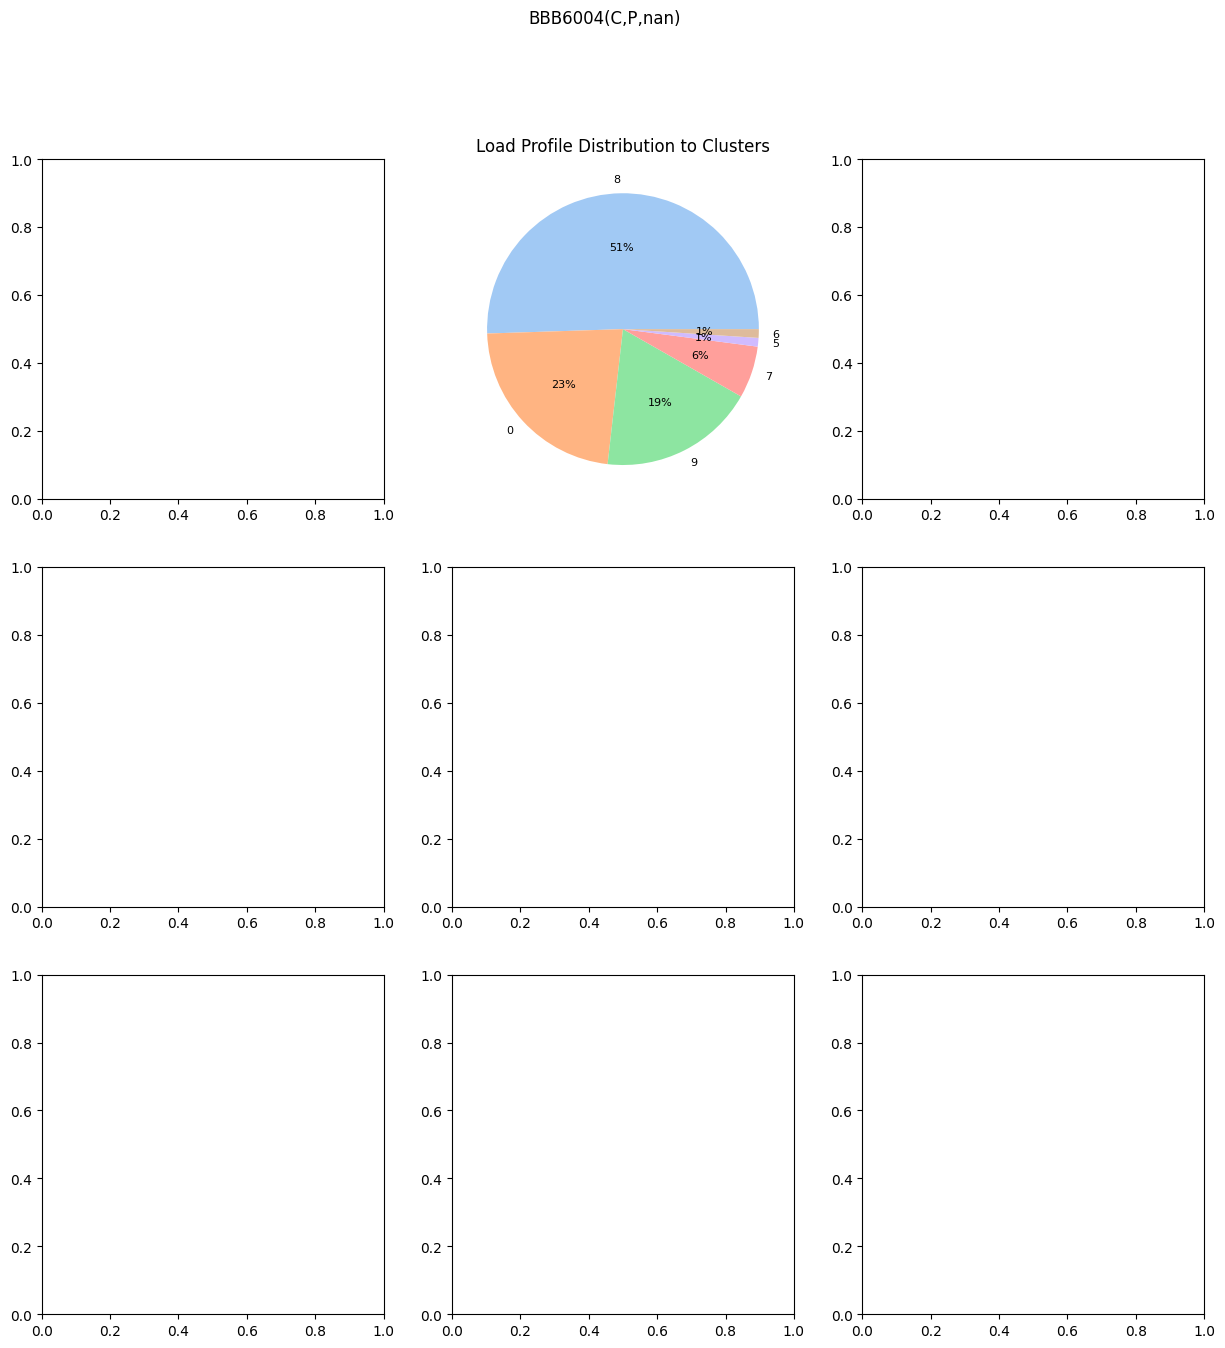

In [101]:
new_data = all_data[all_data['date'] > '2021-01-01 13:15:00']
#new_data = all_data
new_data = new_data[new_data.id != 'BBB6007']
graphs_per_meter(X, new_data, n_clusters, cluster_found, cluster_centers)

In [ ]:

fig = plt.figure(dpi=300)
all_data[all_data['id']=='BBB6181'][all_data['cluster']==4].drop(columns=['cluster', 'month', 'day', 'id', 'date', 'index']).mean().plot(legend=True, linewidth=3  ,ls='--', color='orange', title='Sample day for BBB6181', ax = plt.gca())



In [ ]:

fig = plt.figure(dpi=300)
all_data[all_data['id']=='BBB6192'][all_data['cluster']==11].drop(columns=['cluster', 'month', 'day', 'id', 'date', 'index']).mean().plot(legend=True, linewidth=3  ,ls='--', color='blue', title='Cluster', ax = plt.gca())

